### Logistic Regression Mathematical Background

#### Logistic Function

The logistic function, or sigmoid function, is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

#### Model Equation

The probability that an observation $x$ belongs to the positive class (y=1) is modeled as:

$$
P(y = 1 | x) = \sigma(w^T x + b)
$$

#### Cost Function

The cost function used in logistic regression is the binary cross-entropy loss:

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]
$$

#### Gradient Descent

The gradient descent updates for minimizing the cost function are:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$
$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

where $\alpha$ is the learning rate.

### Example with Numerical Calculations

Given the dataset:

| Feature (x) | Label (y) |
|-------------|-----------|
| 1           | 0         |
| 2           | 0         |
| 3           | 1         |
| 4           | 1         |

After initializing $w$ and $b$ to zero, and performing iterations using gradient descent, the updates might look like:

- **Iteration 1**: Cost = 0.6931, $w = 0.05$, $b = 0.00$
- **Iteration 2**: Cost = 0.6705, $w = 0.091$, $b = -0.003$
- ...
- **Iteration 10**: Cost = 0.6164, $w = 0.250$, $b = -0.083$

Each iteration calculates the cost and updates $w$ and $b$ to minimize the loss.


Accuracy: 1.0


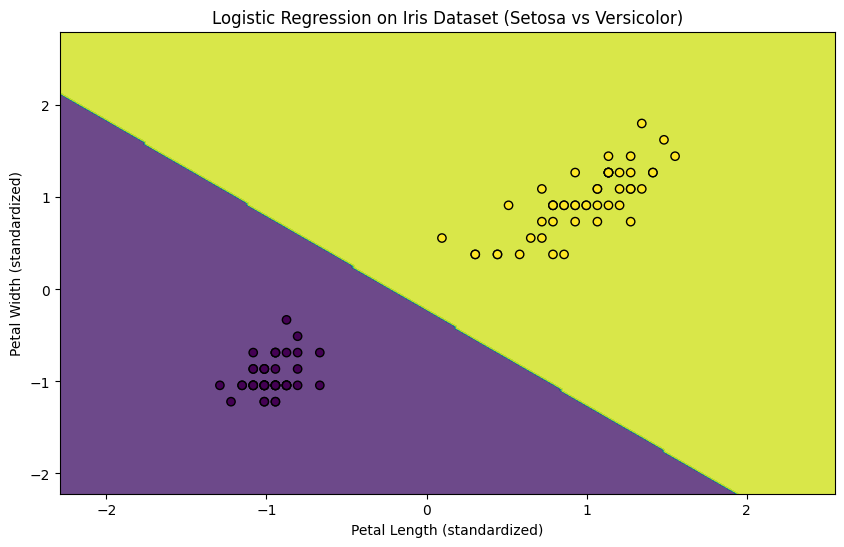

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[iris.target != 2, 2:4]  # Use only petal length and petal width, and two classes
y = iris.target[iris.target != 2]

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a mesh to plot the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k')
plt.title('Logistic Regression on Iris Dataset (Setosa vs Versicolor)')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()
